In [27]:
#import print_function
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error


In [28]:
# define a function to convert a vector of time series into a 2D matrix
def convertSeriesToMatrix(vectorSeries, sequence_length):
    matrix=[]
    for i in range(0,len(vectorSeries)-sequence_length+1,22):
        matrix.append(vectorSeries[i:i+sequence_length])
    return matrix
    
# random seed
np.random.seed(1234)

In [29]:
# load raw data
df_raw = pd.read_csv('C:/Users/Tarang Jain/Desktop/energy-load-dataset.csv', header=None)
# numpy array
df_raw_array = df_raw.values
# daily load
list_daily_load = [df_raw_array[i,:] for i in range(0, len(df_raw)) if i % 24 == 0]
# hourly load (23 loads for each day)
list_hourly_load = [df_raw_array[i,1]/100000 for i in range(0, len(df_raw)) if i % 24 != 0]
# the length of the sequnce for predicting the future value
sequence_length = 23

In [30]:
# convert the vector to a 2D matrix
matrix_load = convertSeriesToMatrix(list_hourly_load, sequence_length)
print (matrix_load[1][1])

12.6166223


In [31]:
# shift all data by mean
matrix_load = np.array(matrix_load)
shifted_value = matrix_load.mean()
matrix_load -= shifted_value
print ("Data  shape: ", matrix_load.shape)

# split dataset: 90% for training and 10% for testing
train_row = int(round(0.9 * matrix_load.shape[0]))
train_set = matrix_load[:train_row, :]


Data  shape:  (222, 23)


In [32]:
# shuffle the training set (but do not shuffle the test set)
np.random.shuffle(train_set)
# the training set
X_train = train_set[:, :-1]
# the last column is the true value to compute the mean-squared-error loss
y_train = train_set[:, -1] 
# the test set
X_test = matrix_load[train_row:, :-1]
y_test = matrix_load[train_row:, -1]
# the input to LSTM layer needs to have the shape of (number of samples, the dimension of each element)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [45]:
# build the model
model = Sequential()
# layer 1: LSTM
model.add(LSTM( input_dim=1, output_dim=50, return_sequences=True))
model.add(Dropout(0.2))
# layer 2: LSTM
model.add(LSTM(output_dim=100, return_sequences=False))
model.add(Dropout(0.2))
# layer 3: dense
# linear activation: a(x) = x
model.add(Dense(output_dim=1, activation='linear'))
# compile the model
model.compile(loss="mse", optimizer="rmsprop")

# train the model
model.fit(X_train, y_train, batch_size=512, nb_epoch=1000, validation_split=0.05, verbose=1)


C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  after removing the cwd from sys.path.
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, units=100)`
  import sys
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda2\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 190 samples, validate on 10 samples
Epoch 1/1000
190/190 [==============================] - 0s - loss: 9.6225 - val_loss: 1.8594
Epoch 2/1000
190/190 [==============================] - 0s - loss: 8.5169 - val_loss: 1.6049
Epoch 3/1000
190/190 [==============================] - 0s - loss: 7.8372 - val_loss: 1.5106
Epoch 4/1000
190/190 [==============================] - 0s - loss: 7.2738 - val_loss: 1.5803
Epoch 5/1000
190/190 [==============================] - 0s - loss: 6.9369 - val_loss: 1.5800
Epoch 6/1000
190/190 [==============================] - 0s - loss: 6.7025 - val_loss: 1.5631
Epoch 7/1000
190/190 [==============================] - 0s - loss: 6.5497 - val_loss: 1.4391
Epoch 8/1000
190/190 [==============================] - 0s - loss: 6.2544 - val_loss: 1.4525
Epoch 9/1000
190/190 [==============================] - 0s - loss: 6.0160 - val_loss: 1.2972
Epoch 10/1000
190/190 [==============================] - 0s - loss: 5.6946 - val_loss: 1.5974
Epoch 11/1000
190/190 [=

190/190 [==============================] - 0s - loss: 1.0439 - val_loss: 0.2676
Epoch 88/1000
190/190 [==============================] - 0s - loss: 0.7840 - val_loss: 0.5480
Epoch 89/1000
190/190 [==============================] - 0s - loss: 0.7886 - val_loss: 0.2448
Epoch 90/1000
190/190 [==============================] - 0s - loss: 0.9260 - val_loss: 0.8390
Epoch 91/1000
190/190 [==============================] - 0s - loss: 0.9793 - val_loss: 0.2769
Epoch 92/1000
190/190 [==============================] - 0s - loss: 0.8116 - val_loss: 0.5461
Epoch 93/1000
190/190 [==============================] - 0s - loss: 0.7980 - val_loss: 0.2579
Epoch 94/1000
190/190 [==============================] - 0s - loss: 0.7112 - val_loss: 0.4065
Epoch 95/1000
190/190 [==============================] - 0s - loss: 0.6943 - val_loss: 0.3634
Epoch 96/1000
190/190 [==============================] - 0s - loss: 0.6269 - val_loss: 0.3077
Epoch 97/1000
190/190 [==============================] - 0s - loss: 0.6873

190/190 [==============================] - 0s - loss: 0.4037 - val_loss: 0.1763
Epoch 174/1000
190/190 [==============================] - 0s - loss: 0.3576 - val_loss: 0.2569
Epoch 175/1000
190/190 [==============================] - 0s - loss: 0.3597 - val_loss: 0.2683
Epoch 176/1000
190/190 [==============================] - 0s - loss: 0.3786 - val_loss: 0.2581
Epoch 177/1000
190/190 [==============================] - 0s - loss: 0.4691 - val_loss: 0.2283
Epoch 178/1000
190/190 [==============================] - 0s - loss: 0.4202 - val_loss: 0.2966
Epoch 179/1000
190/190 [==============================] - 0s - loss: 0.5085 - val_loss: 0.3176
Epoch 180/1000
190/190 [==============================] - 0s - loss: 0.4673 - val_loss: 0.2701
Epoch 181/1000
190/190 [==============================] - 0s - loss: 0.3311 - val_loss: 0.1725
Epoch 182/1000
190/190 [==============================] - 0s - loss: 0.3345 - val_loss: 0.2293
Epoch 183/1000
190/190 [==============================] - 0s - lo

190/190 [==============================] - 0s - loss: 0.3378 - val_loss: 0.2114
Epoch 260/1000
190/190 [==============================] - 0s - loss: 0.2230 - val_loss: 0.2039
Epoch 261/1000
190/190 [==============================] - 0s - loss: 0.3029 - val_loss: 0.1966
Epoch 262/1000
190/190 [==============================] - 0s - loss: 0.3345 - val_loss: 0.3749
Epoch 263/1000
190/190 [==============================] - 0s - loss: 0.3147 - val_loss: 0.2066
Epoch 264/1000
190/190 [==============================] - 0s - loss: 0.2265 - val_loss: 0.2195
Epoch 265/1000
190/190 [==============================] - 0s - loss: 0.2523 - val_loss: 0.2359
Epoch 266/1000
190/190 [==============================] - 0s - loss: 0.2024 - val_loss: 0.2185
Epoch 267/1000
190/190 [==============================] - 0s - loss: 0.2449 - val_loss: 0.2335
Epoch 268/1000
190/190 [==============================] - 0s - loss: 0.2104 - val_loss: 0.2157
Epoch 269/1000
190/190 [==============================] - 0s - lo

190/190 [==============================] - 0s - loss: 0.2316 - val_loss: 0.2685
Epoch 346/1000
190/190 [==============================] - 0s - loss: 0.2277 - val_loss: 0.1928
Epoch 347/1000
190/190 [==============================] - 0s - loss: 0.2622 - val_loss: 0.2378
Epoch 348/1000
190/190 [==============================] - 0s - loss: 0.1545 - val_loss: 0.1789
Epoch 349/1000
190/190 [==============================] - 0s - loss: 0.1922 - val_loss: 0.2646
Epoch 350/1000
190/190 [==============================] - 0s - loss: 0.1774 - val_loss: 0.1503
Epoch 351/1000
190/190 [==============================] - 0s - loss: 0.2096 - val_loss: 0.3206
Epoch 352/1000
190/190 [==============================] - 0s - loss: 0.2156 - val_loss: 0.1677
Epoch 353/1000
190/190 [==============================] - 0s - loss: 0.2411 - val_loss: 0.2118
Epoch 354/1000
190/190 [==============================] - 0s - loss: 0.2576 - val_loss: 0.1936
Epoch 355/1000
190/190 [==============================] - 0s - lo

190/190 [==============================] - 0s - loss: 0.1754 - val_loss: 0.1398
Epoch 432/1000
190/190 [==============================] - 0s - loss: 0.1735 - val_loss: 0.1504
Epoch 433/1000
190/190 [==============================] - 0s - loss: 0.1476 - val_loss: 0.1218
Epoch 434/1000
190/190 [==============================] - 0s - loss: 0.1503 - val_loss: 0.2019
Epoch 435/1000
190/190 [==============================] - 0s - loss: 0.1716 - val_loss: 0.1956
Epoch 436/1000
190/190 [==============================] - 0s - loss: 0.1718 - val_loss: 0.1664
Epoch 437/1000
190/190 [==============================] - 0s - loss: 0.1828 - val_loss: 0.1866
Epoch 438/1000
190/190 [==============================] - 0s - loss: 0.2010 - val_loss: 0.2119
Epoch 439/1000
190/190 [==============================] - 0s - loss: 0.2117 - val_loss: 0.1503
Epoch 440/1000
190/190 [==============================] - 0s - loss: 0.1507 - val_loss: 0.2026
Epoch 441/1000
190/190 [==============================] - 0s - lo

190/190 [==============================] - 0s - loss: 0.1374 - val_loss: 0.1357
Epoch 518/1000
190/190 [==============================] - 0s - loss: 0.1443 - val_loss: 0.1981
Epoch 519/1000
190/190 [==============================] - 0s - loss: 0.1480 - val_loss: 0.1607
Epoch 520/1000
190/190 [==============================] - 0s - loss: 0.1850 - val_loss: 0.2162
Epoch 521/1000
190/190 [==============================] - 0s - loss: 0.1533 - val_loss: 0.2245
Epoch 522/1000
190/190 [==============================] - 0s - loss: 0.1436 - val_loss: 0.2280
Epoch 523/1000
190/190 [==============================] - 0s - loss: 0.1577 - val_loss: 0.2259
Epoch 524/1000
190/190 [==============================] - 0s - loss: 0.1659 - val_loss: 0.1689
Epoch 525/1000
190/190 [==============================] - 0s - loss: 0.1959 - val_loss: 0.3047
Epoch 526/1000
190/190 [==============================] - 0s - loss: 0.1399 - val_loss: 0.1145
Epoch 527/1000
190/190 [==============================] - 0s - lo

190/190 [==============================] - 0s - loss: 0.2209 - val_loss: 0.2168
Epoch 604/1000
190/190 [==============================] - 0s - loss: 0.1713 - val_loss: 0.1535
Epoch 605/1000
190/190 [==============================] - 0s - loss: 0.1753 - val_loss: 0.2163
Epoch 606/1000
190/190 [==============================] - 0s - loss: 0.1301 - val_loss: 0.2167
Epoch 607/1000
190/190 [==============================] - 0s - loss: 0.1402 - val_loss: 0.1974
Epoch 608/1000
190/190 [==============================] - 0s - loss: 0.1314 - val_loss: 0.1830
Epoch 609/1000
190/190 [==============================] - 0s - loss: 0.1463 - val_loss: 0.2120
Epoch 610/1000
190/190 [==============================] - 0s - loss: 0.1532 - val_loss: 0.1793
Epoch 611/1000
190/190 [==============================] - 0s - loss: 0.1453 - val_loss: 0.1716
Epoch 612/1000
190/190 [==============================] - 0s - loss: 0.1470 - val_loss: 0.1613
Epoch 613/1000
190/190 [==============================] - 0s - lo

190/190 [==============================] - 0s - loss: 0.1502 - val_loss: 0.1985
Epoch 690/1000
190/190 [==============================] - 0s - loss: 0.1254 - val_loss: 0.2156
Epoch 691/1000
190/190 [==============================] - 0s - loss: 0.1269 - val_loss: 0.2389
Epoch 692/1000
190/190 [==============================] - 0s - loss: 0.1215 - val_loss: 0.1869
Epoch 693/1000
190/190 [==============================] - 0s - loss: 0.1106 - val_loss: 0.1844
Epoch 694/1000
190/190 [==============================] - 0s - loss: 0.1020 - val_loss: 0.1823
Epoch 695/1000
190/190 [==============================] - 0s - loss: 0.1447 - val_loss: 0.2402
Epoch 696/1000
190/190 [==============================] - 0s - loss: 0.1388 - val_loss: 0.1825
Epoch 697/1000
190/190 [==============================] - 0s - loss: 0.0898 - val_loss: 0.2096
Epoch 698/1000
190/190 [==============================] - 0s - loss: 0.1336 - val_loss: 0.1478
Epoch 699/1000
190/190 [==============================] - 0s - lo

190/190 [==============================] - 0s - loss: 0.0883 - val_loss: 0.2135
Epoch 776/1000
190/190 [==============================] - 0s - loss: 0.0763 - val_loss: 0.2099
Epoch 777/1000
190/190 [==============================] - 0s - loss: 0.1292 - val_loss: 0.1907
Epoch 778/1000
190/190 [==============================] - 0s - loss: 0.1127 - val_loss: 0.2709
Epoch 779/1000
190/190 [==============================] - 0s - loss: 0.1364 - val_loss: 0.1844
Epoch 780/1000
190/190 [==============================] - 0s - loss: 0.1111 - val_loss: 0.2224
Epoch 781/1000
190/190 [==============================] - 0s - loss: 0.1012 - val_loss: 0.1375
Epoch 782/1000
190/190 [==============================] - 0s - loss: 0.1321 - val_loss: 0.2955
Epoch 783/1000
190/190 [==============================] - 0s - loss: 0.1449 - val_loss: 0.1890
Epoch 784/1000
190/190 [==============================] - 0s - loss: 0.1283 - val_loss: 0.2134
Epoch 785/1000
190/190 [==============================] - 0s - lo

190/190 [==============================] - 0s - loss: 0.1062 - val_loss: 0.2211
Epoch 862/1000
190/190 [==============================] - 0s - loss: 0.0946 - val_loss: 0.1637
Epoch 863/1000
190/190 [==============================] - 0s - loss: 0.1185 - val_loss: 0.2461
Epoch 864/1000
190/190 [==============================] - 0s - loss: 0.1219 - val_loss: 0.1565
Epoch 865/1000
190/190 [==============================] - 0s - loss: 0.1140 - val_loss: 0.2813
Epoch 866/1000
190/190 [==============================] - 0s - loss: 0.1742 - val_loss: 0.1626
Epoch 867/1000
190/190 [==============================] - 0s - loss: 0.1067 - val_loss: 0.1968
Epoch 868/1000
190/190 [==============================] - 0s - loss: 0.0863 - val_loss: 0.2227
Epoch 869/1000
190/190 [==============================] - 0s - loss: 0.0966 - val_loss: 0.2149
Epoch 870/1000
190/190 [==============================] - 0s - loss: 0.1132 - val_loss: 0.2280
Epoch 871/1000
190/190 [==============================] - 0s - lo

190/190 [==============================] - 0s - loss: 0.0994 - val_loss: 0.2766
Epoch 948/1000
190/190 [==============================] - 0s - loss: 0.0808 - val_loss: 0.2334
Epoch 949/1000
190/190 [==============================] - 0s - loss: 0.0916 - val_loss: 0.2405
Epoch 950/1000
190/190 [==============================] - 0s - loss: 0.1000 - val_loss: 0.2186
Epoch 951/1000
190/190 [==============================] - 0s - loss: 0.0880 - val_loss: 0.1833
Epoch 952/1000
190/190 [==============================] - 0s - loss: 0.1088 - val_loss: 0.2269
Epoch 953/1000
190/190 [==============================] - 0s - loss: 0.1214 - val_loss: 0.1878
Epoch 954/1000
190/190 [==============================] - 0s - loss: 0.1000 - val_loss: 0.2668
Epoch 955/1000
190/190 [==============================] - 0s - loss: 0.0979 - val_loss: 0.1837
Epoch 956/1000
190/190 [==============================] - 0s - loss: 0.0697 - val_loss: 0.2364
Epoch 957/1000
190/190 [==============================] - 0s - lo

In [46]:
# evaluate the result
test_mse = model.evaluate(X_test, y_test, verbose=1)
print ('\nThe mean squared error (MSE) on the test data set is %.3f over %d test samples.' % (test_mse, len(y_test)))


22/22 [==============================] - 0s

The mean squared error (MSE) on the test data set is 0.502 over 22 test samples.


In [47]:
# get the predicted values
predicted_values = model.predict(X_test)
num_test_samples = len(predicted_values)
predicted_values = np.reshape(predicted_values, (num_test_samples,1))


In [48]:
testScore = math.sqrt(mean_squared_error(y_test + shifted_value,predicted_values + shifted_value ))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.71 RMSE


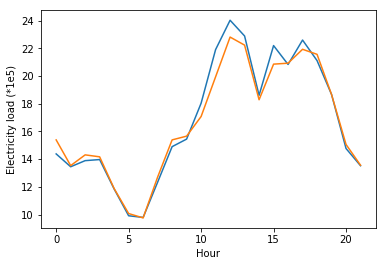

In [49]:
# plot the results
fig = plt.figure()
plt.plot(y_test + shifted_value)
plt.plot(predicted_values + shifted_value)
plt.xlabel('Hour')
plt.ylabel('Electricity load (*1e5)')
plt.show()
#fig.savefig('output_load_forecasting.jpg', bbox_inches='tight')

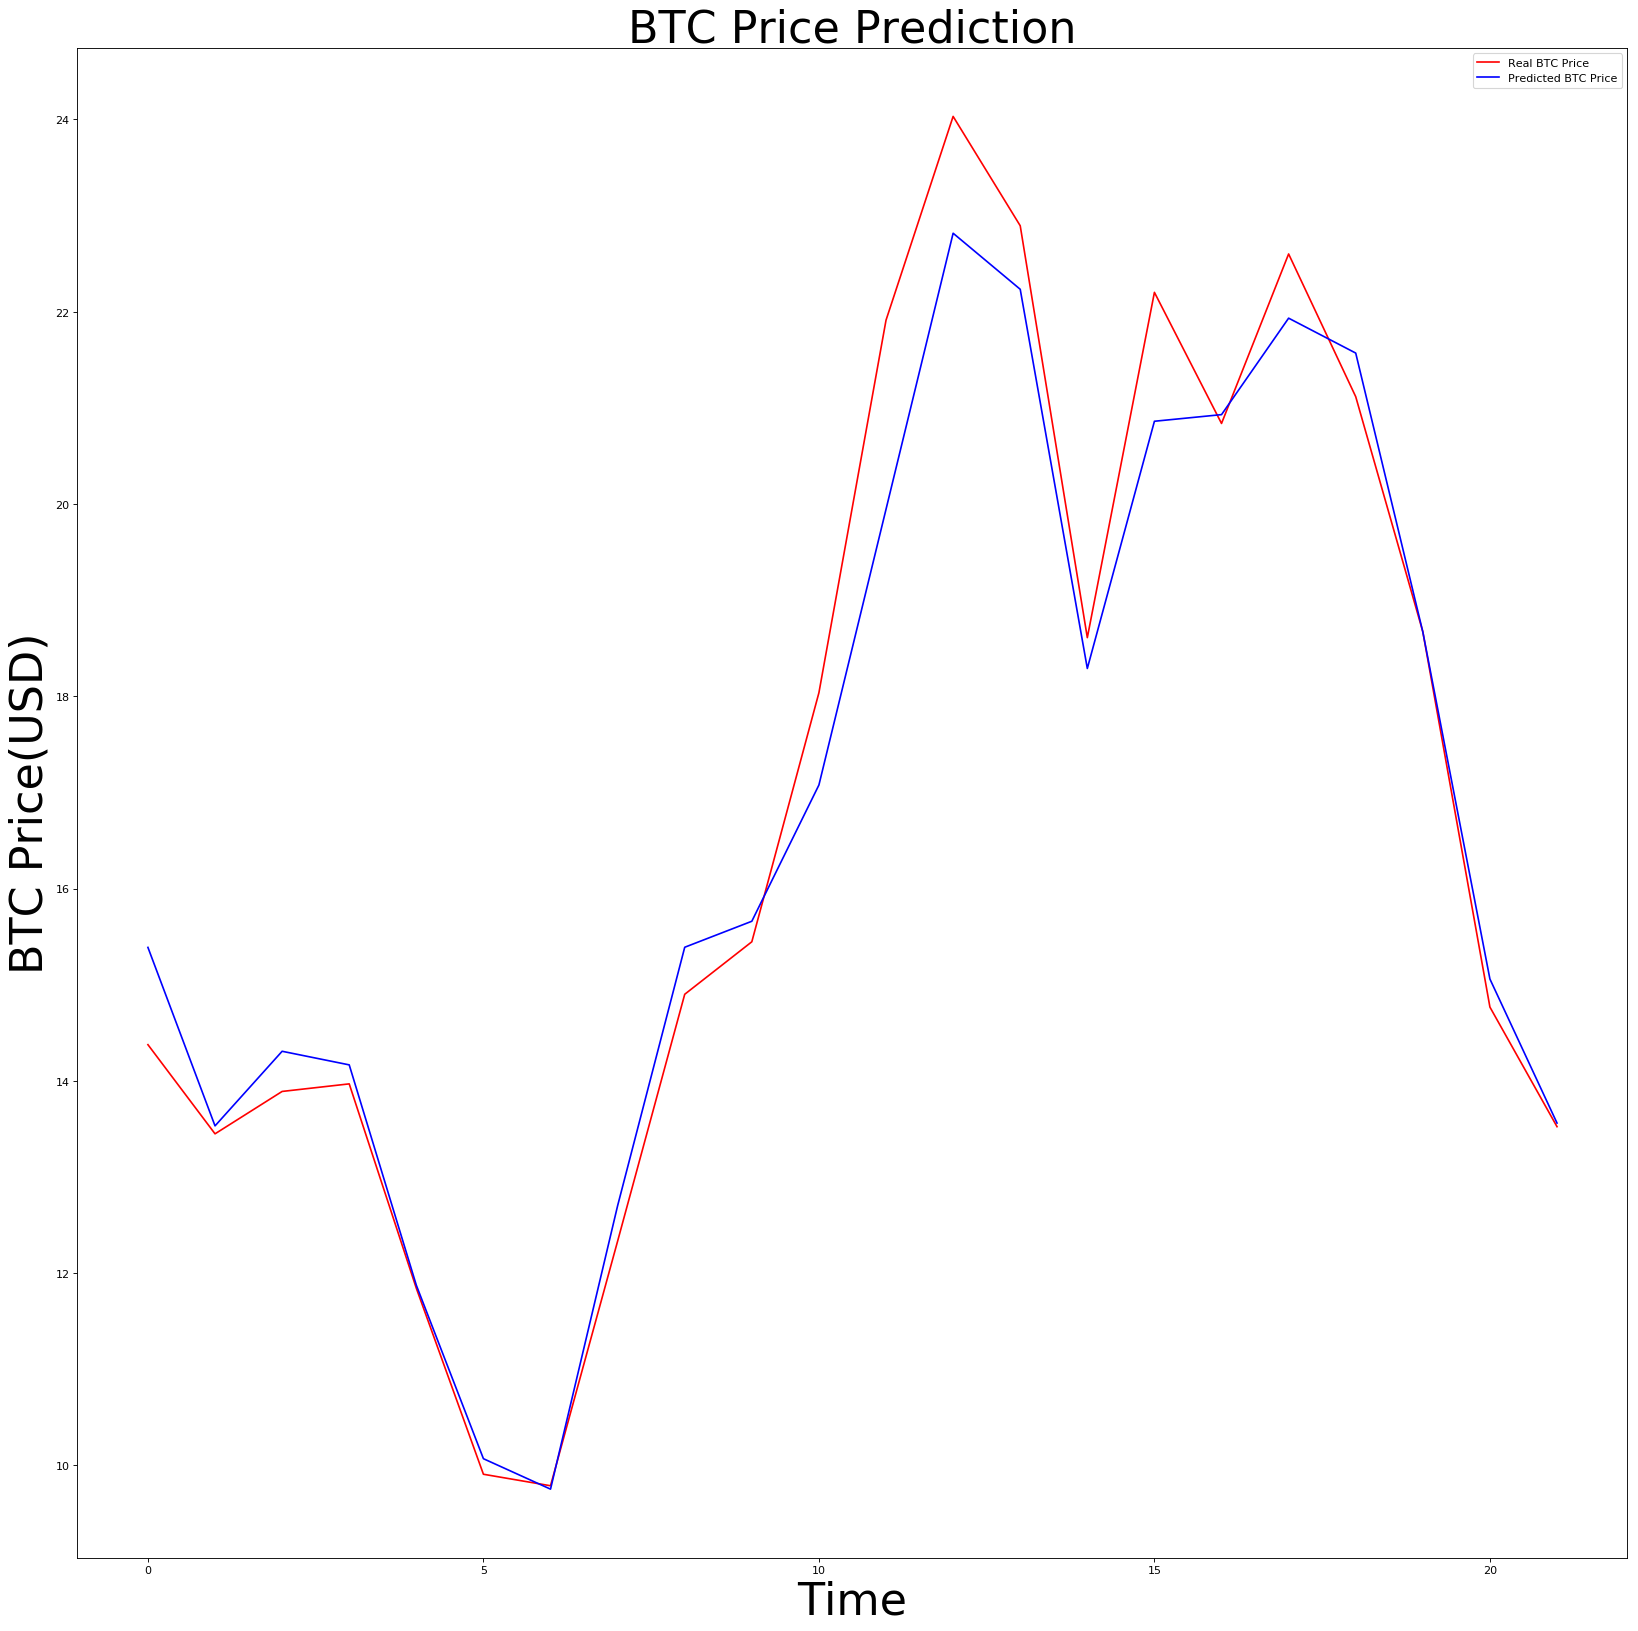

In [50]:
plt.figure(figsize=(25, 25), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(y_test + shifted_value, color='red', label='Real BTC Price')
plt.plot(predicted_values + shifted_value, color = 'blue', label = 'Predicted BTC Price')

plt.title('BTC Price Prediction', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.legend(loc = 'best')
plt.show()

In [ ]:
# save the result into txt file
test_result = np.vstack((predicted_values, y_test)) + shifted_value
np.savetxt('output_load_forecasting_result.txt', test_result)
